Week 14 Lark Activity

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

How will you help this NGO to make a correct decision based on socio- economic and health factors?

In [150]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [151]:
# To filter/truncate warnings
import warnings
warnings.filterwarnings('ignore')

In [152]:
data_df = pd.read_csv(r"/Users/saras/Desktop/DSA 2022/datasets/Country-data.csv")

In [153]:
data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [154]:
data_df.shape

(167, 10)

In [155]:
#Find missing values
data_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [156]:
#Find duplicate values 
print(f'Duplicates in dataset: {data_df.duplicated().sum()},({np.round(100*data_df.duplicated().sum()/len(data_df),1)}%)')


Duplicates in dataset: 0,(0.0%)


In [157]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<h5> More info on attributes</h5>

|Column|Name|Description| 
| ---| ---| ---|
0|country|Name of the country
1|child_mort|Death of children under 5 years of age per 1000 live births
2|exports|Exports of goods and services per capita. Given as %age of the GDP per capita
3|health|Total health spending per capita. Given as %age of GDP per capita
4|imports|Imports of goods and services per capita. Given as %age of the GDP per capita
5|Income|Net income per person
6|Inflation|The measurement of the annual growth rate of the Total GDP
7|life_expec|The average number of years a new born child would live if the current mortality patterns are to remain the same
8|total_fer|The number of children that would be born to each woman if the current age-fertility rates remain the same.
9|gdpp|The GDP per capita. Calculated as the Total GDP divided by the total population.

In [158]:
#data transformation
# Converting imports, exports and health spending percentages to absolute values.
data_df['exports'] = data_df['exports']*data_df['gdpp']/100
data_df['health'] = data_df['health']*data_df['gdpp']/100
data_df['imports'] = data_df['imports']*data_df['gdpp']/100
data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [159]:
data_df.describe(percentiles=[.25, .5, .75, .90 ,.95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
child_mort,167.0,38.270060,40.328931,2.600000,8.2500,19.300,62.10,100.220,116.000,153.4000,208.00
exports,167.0,7420.618847,17973.885795,1.076920,447.1400,1777.440,7278.00,17760.600,31385.100,64794.2600,183750.00
health,167.0,1056.733204,1801.408906,12.821200,78.5355,321.886,976.94,3825.416,4966.701,8410.3304,8663.60
imports,167.0,6588.352108,14710.810418,0.651092,640.2150,2045.580,7719.60,15034.280,24241.560,55371.3900,149100.00
income,167.0,17144.688623,19278.067698,609.000000,3355.0000,9960.000,22800.00,41220.000,48290.000,84374.0000,125000.00
inflation,167.0,7.781832,10.570704,-4.210000,1.8100,5.390,10.75,16.640,20.870,41.4780,104.00
life_expec,167.0,70.555689,8.893172,32.100000,65.3000,73.100,76.80,80.400,81.400,82.3700,82.80
total_fer,167.0,2.947964,1.513848,1.150000,1.7950,2.410,3.88,5.322,5.861,6.5636,7.49
gdpp,167.0,12964.155689,18328.704809,231.000000,1330.0000,4660.000,14050.00,41840.000,48610.000,79088.0000,105000.00


<h3>EDA</h3>
<h4> Univariate Analysis </h4>


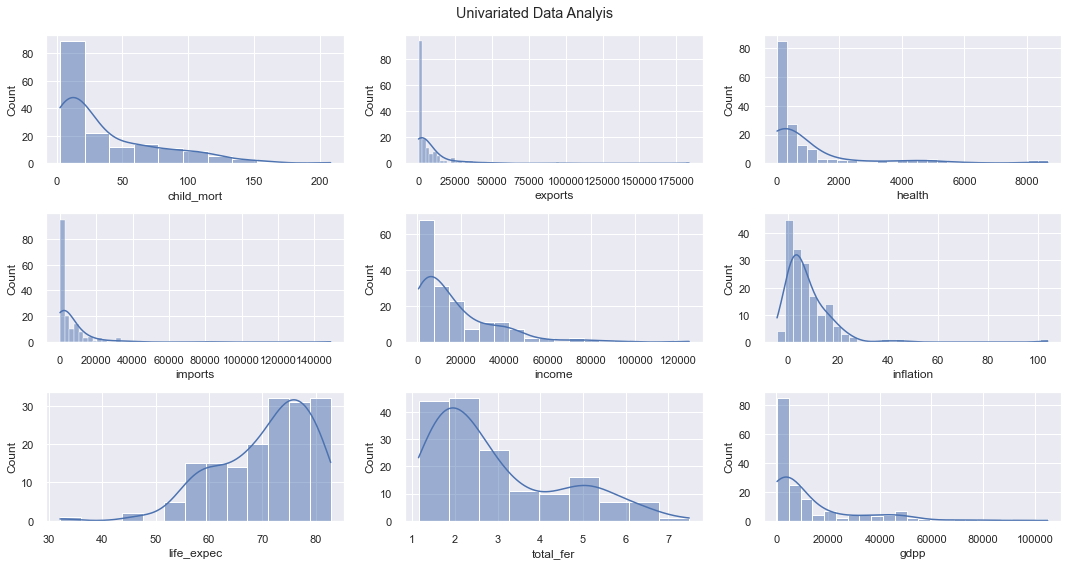

In [128]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8))
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= data_df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(data_df[i], ax=ax[x], kde=True)
plt.tight_layout()
plt.show()

1. Continuous numerical columns, mostly right skewed with with possible outliers. 


<h4>Bivariate Analysis</h4>

- child_mort 
- exports
- health
- imports
- income
- inflation
- life_expec
- total_fer
- gdpp

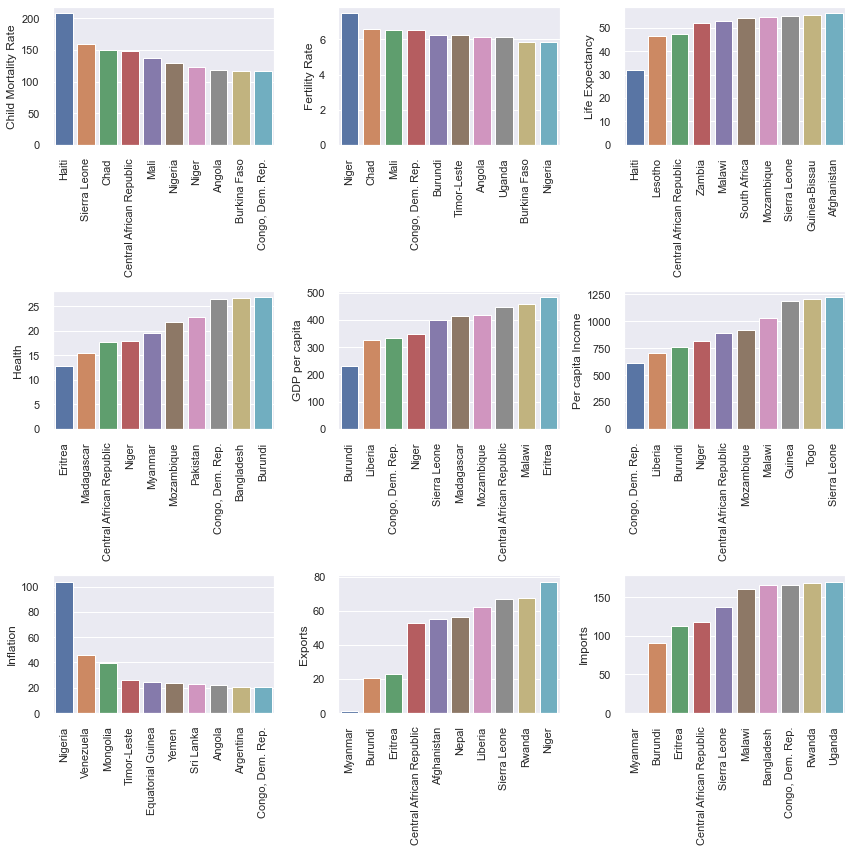

In [130]:
#Check for top 10 affected contries countries:
fig, axs = plt.subplots(3,3,figsize = (12,12))

# poor top 10 countries represented as `top10`

# Child Mortality Rate 
top10_child_mort = data_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Exports
top10_exports = data_df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt2 = sns.barplot(x='country', y='exports', data= top10_exports, ax = axs[2,1])
plt2.set(xlabel = '', ylabel= 'Exports')

# Health 
top10_health = data_df[['country','health']].sort_values('health', ascending = True).head(10)
plt3 = sns.barplot(x='country', y='health', data= top10_health, ax = axs[1,0])
plt3.set(xlabel = '', ylabel= 'Health')

# Imports
top10_imports = data_df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt4 = sns.barplot(x='country', y='imports', data= top10_imports, ax = axs[2,2])
plt4.set(xlabel = '', ylabel= 'Imports')

# Per capita Income 
top10_income = data_df[['country','income']].sort_values('income', ascending = True).head(10)
plt5 = sns.barplot(x='country', y='income', data= top10_income, ax = axs[1,2])
plt5.set(xlabel = '', ylabel= 'Per capita Income')

# Inflation
top10_inflation = data_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt6 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt6.set(xlabel = '', ylabel= 'Inflation')

# Fertility Rate
top10_total_fer = data_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt7 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt7.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy
top10_life_expec = data_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt8 = sns.barplot(x='country', y='life_expec', data= top10_life_expec, ax = axs[0,2])
plt8.set(xlabel = '', ylabel= 'Life Expectancy')

# The GDP per capita 
top10_gdpp = data_df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt9 = sns.barplot(x='country', y='gdpp', data= top10_gdpp, ax = axs[1,1])
plt9.set(xlabel = '', ylabel= 'GDP per capita')


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()
    


From above bar plot we could see the common countries in the profile of gdpp, child_mort and income are:

Congo, Dem. Rep., Niger, Sierra Leone,Central African Republic

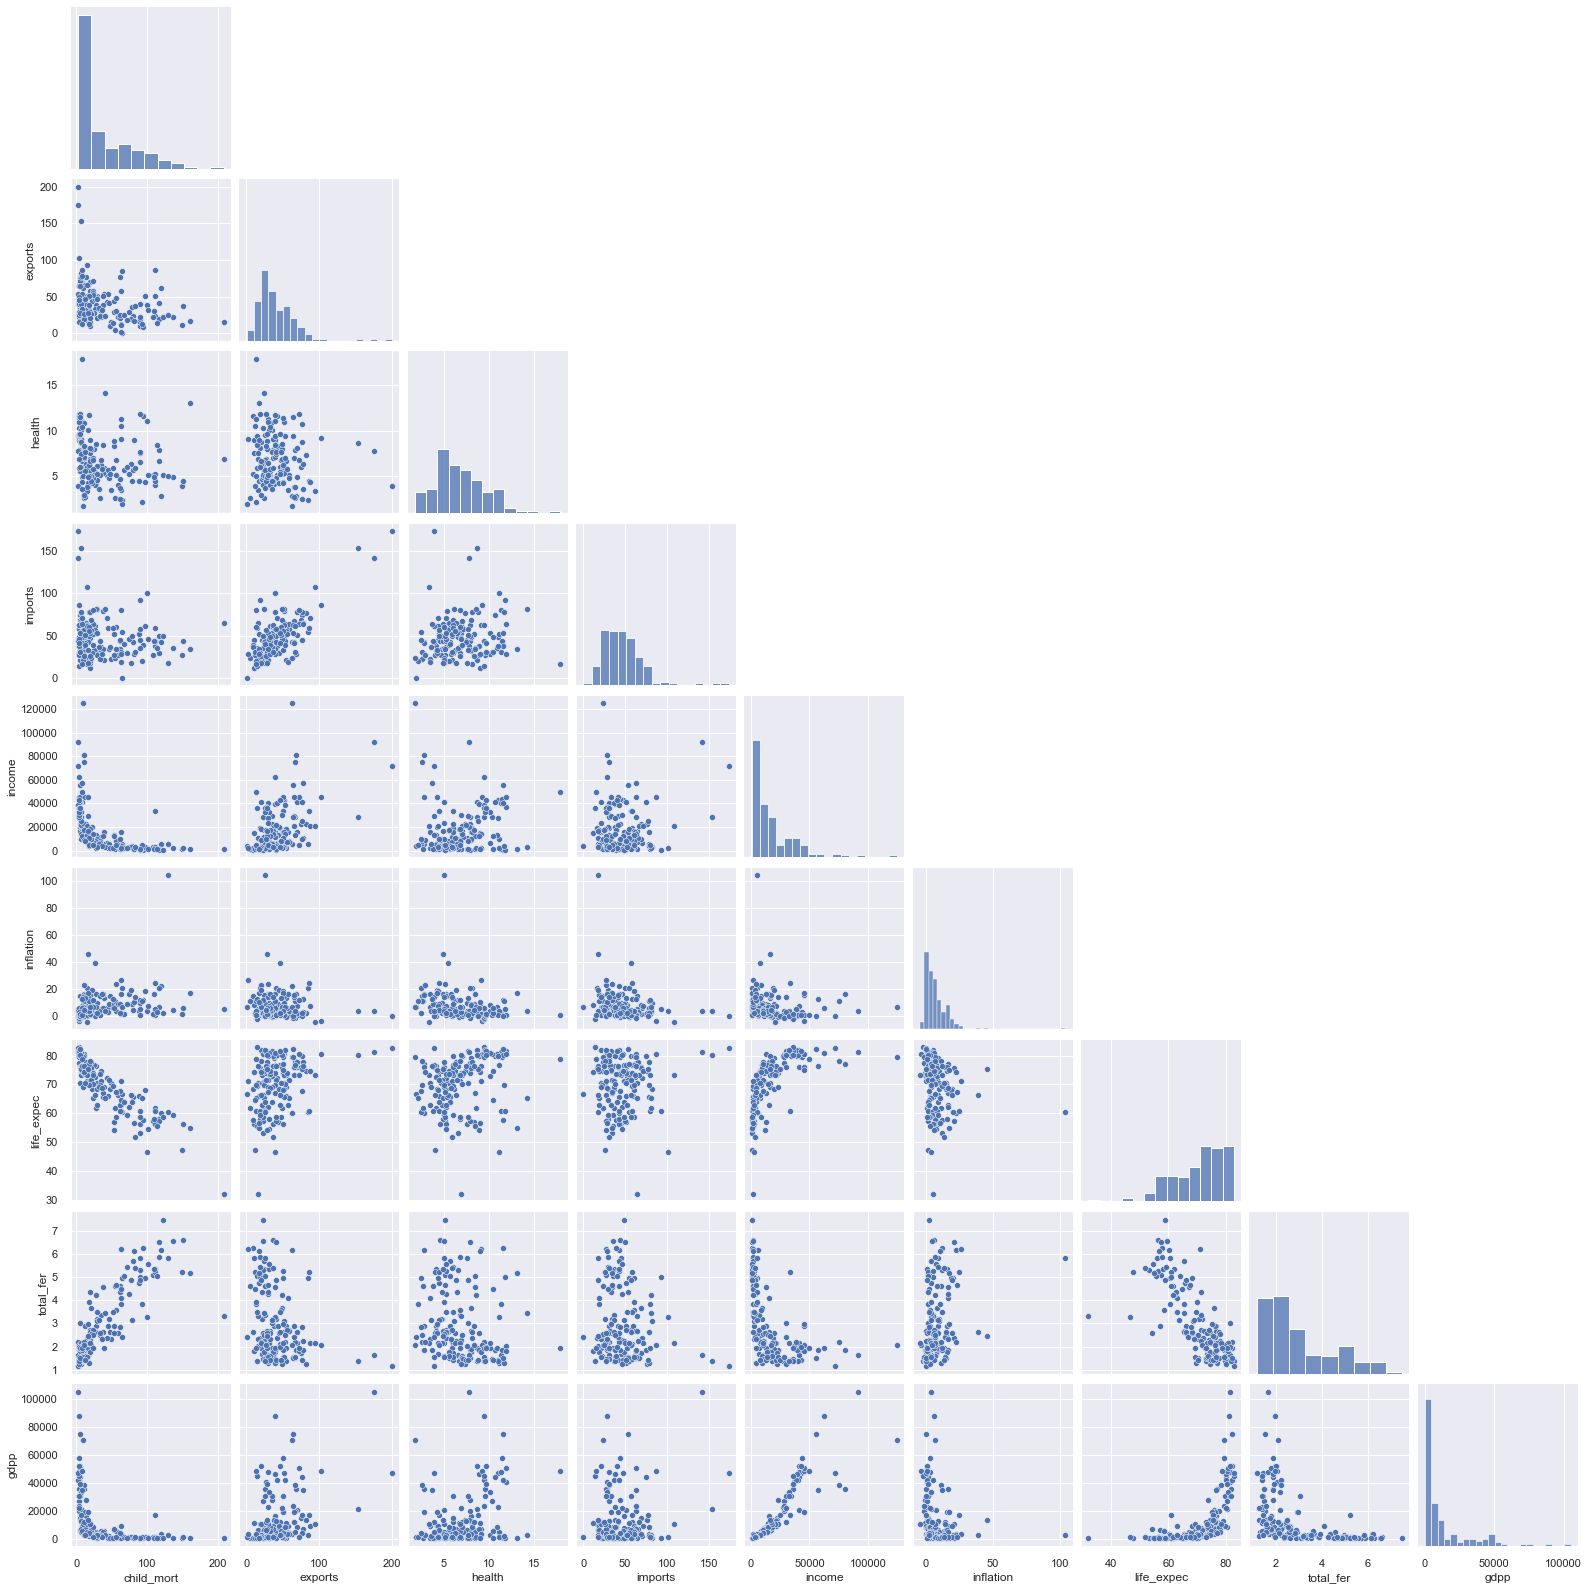

In [46]:
sns.pairplot(data_df,corner=True)

- Data points are NOT normally distributed. 
- GDP vs Income - a positiove relationship
- total_fer Vs child_mor positive relationship ,total_fer Vs life_expec negative relatioship 
- life_exp vs child_mor negative linear relationship 

Confirming this by generating a heap map below.

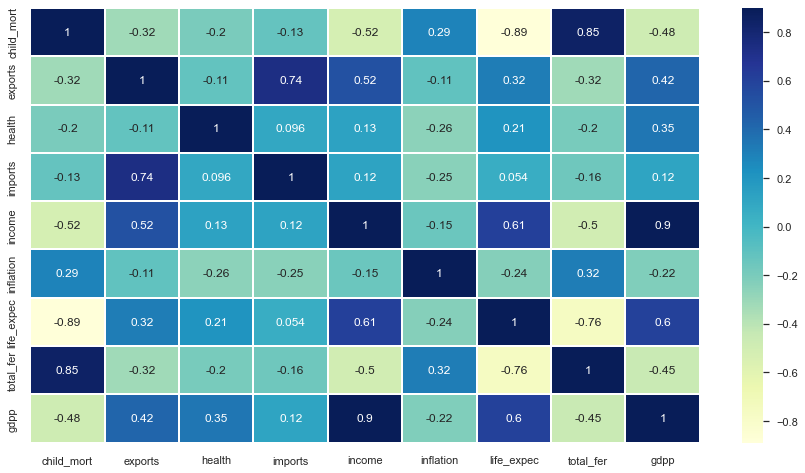

In [47]:
#Pearson method
fig=plt.figure(figsize=(15,8))
sns.heatmap(data_df.select_dtypes(exclude='object').corr(),annot=True,linewidth=0.2,vmin=-0.89,vmax=0.9,
            cmap = 'YlGnBu')
plt.show()

1. gdpp and income are most highly correlated with correlation of 0.9
2. child_mort and life_expec are highly correlated with correlation of -0.89
3. child_mort and total_fer are highly correlated with correlation of 0.85
4. life_expentency and total_fertility are highly correlated with correlation of -0.76 
5. Features that could be considered for dropping due to high correlation - income, total_fer, life_expec

<h3>Outlier Handling</h3>

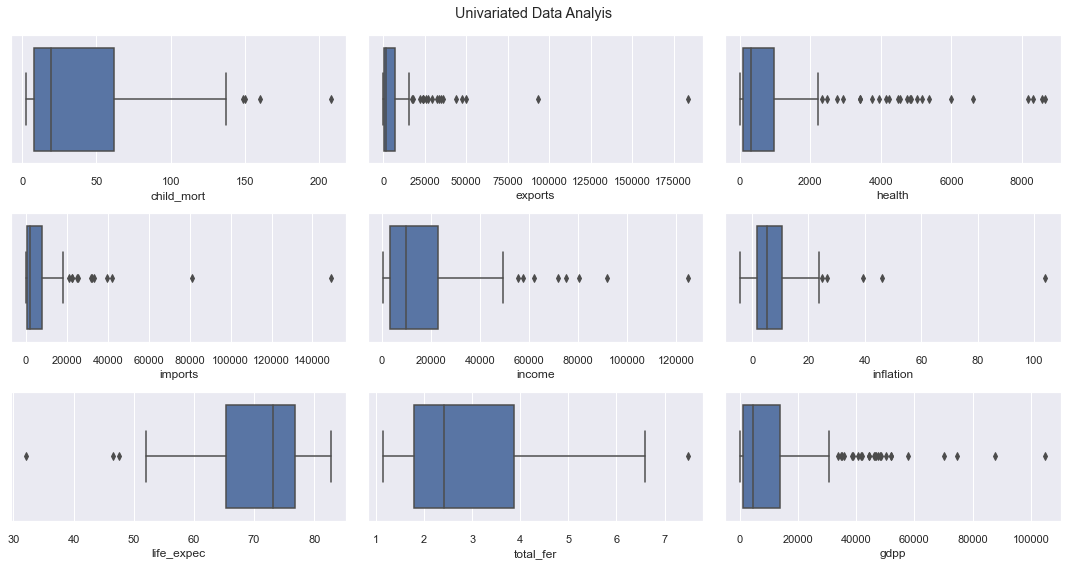

In [160]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8))
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= data_df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data_df[i], ax=ax[x])
plt.tight_layout()
plt.show()

Insights:

Boxplot shows outliers. However, outliers must not be handled as outliers are expected in country dataset.
Handling them will result in eliminating eligible countries. 

So considering all the scenario we would cap the extreme values in the outliers to 0.01 and 0.99 percentile. By doing this we will be avoiding the risk of cluster overlapping.

There are some exclusions while doing outlier treatment.
child_mort, inflation: High Child mortality and higher inflation are our matter of concern so we will not do uppercapping for these features.
export, health, imports, total_fer and gdpp : It has outlier at higher level. We will impute outlier to upper capping (0.99 percentile)
life_expec : It has outlers bellow the lower hinge, But again it is our matter of concern so we will not impute these values.

In [161]:
# selectig numerical columns and droppig country
df = data_df.drop('country', axis=1)

In [162]:
# list cols for upper capping and get insights of data
cols = ['exports', 'health', 'imports', 'total_fer','gdpp']
df[cols].describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,exports,health,imports,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,7420.618847,1056.733204,6588.352108,2.947964,12964.155689
std,17973.885795,1801.408906,14710.810418,1.513848,18328.704809
min,1.076920,12.821200,0.651092,1.150000,231.000000
1%,22.243716,17.009362,104.909640,1.243200,331.620000
25%,447.140000,78.535500,640.215000,1.795000,1330.000000
50%,1777.440000,321.886000,2045.580000,2.410000,4660.000000
75%,7278.000000,976.940000,7719.600000,3.880000,14050.000000
99%,64794.260000,8410.330400,55371.390000,6.563600,79088.000000
max,183750.000000,8663.600000,149100.000000,7.490000,105000.000000


In [163]:
# upper capping to 0.99 percentile
cap = 0.99
for col in cols:
    HL = round(df[col].quantile(cap),2)
    df[col] = df[col].apply(lambda x: HL if x>HL else x)

In [164]:
# Check values after outlier treatment
df[cols].describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,exports,health,imports,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,6538.214776,1054.206617,5873.135222,2.942216,12756.826347
std,11415.308590,1790.845323,9422.700869,1.498235,17430.208938
min,1.076920,12.821200,0.651092,1.150000,231.000000
1%,22.243716,17.009362,104.909640,1.243200,331.620000
25%,447.140000,78.535500,640.215000,1.795000,1330.000000
50%,1777.440000,321.886000,2045.580000,2.410000,4660.000000
75%,7278.000000,976.940000,7719.600000,3.880000,14050.000000
99%,55136.308400,8352.982600,46629.102600,6.553400,76125.920000
max,64794.260000,8410.330000,55371.390000,6.560000,79088.000000


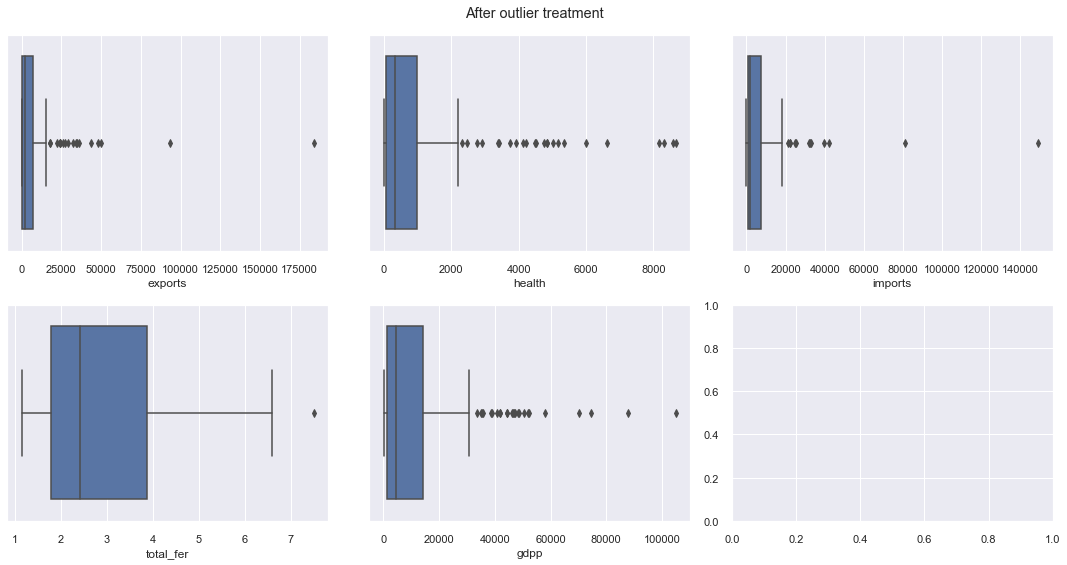

In [165]:
# check outliers after capping
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(15,8))
plt.suptitle("After outlier treatment")
ax=ax.flatten()

for x, i in enumerate(df[cols].columns):
    sns.boxplot(data_df[i], ax=ax[x])
plt.tight_layout()
plt.show()

<h4>Scaling the dataset</h4>

In [170]:
#Scaling the dataset with min max scaler
#Due to varing levels of measurements - numbers, dollar value  etc. 
#features with varying high magnitudes vs some features with low magnitues. 


# scaling the data
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scaled_data = scalar.fit_transform(df)

#new dataframe with scaled data and column values
scaled_data = pd.DataFrame(scaled_data, columns = df.columns)

scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,0.173661,0.196343,0.0,0.027507,0.081305,0.289679,1.0
exports,167.0,0.100892,0.176181,0.0,0.006884,0.027416,0.112310,1.0
health,167.0,0.124011,0.213259,0.0,0.007825,0.036804,0.114810,1.0
imports,167.0,0.106058,0.170175,0.0,0.011551,0.036932,0.139405,1.0
income,167.0,0.132933,0.154980,0.0,0.022076,0.075174,0.178397,1.0
inflation,167.0,0.110820,0.097687,0.0,0.055633,0.088716,0.138250,1.0
life_expec,167.0,0.758495,0.175408,0.0,0.654832,0.808679,0.881657,1.0
total_fer,167.0,0.331278,0.276938,0.0,0.119224,0.232902,0.504621,1.0
gdpp,167.0,0.158842,0.221036,0.0,0.013937,0.056165,0.175241,1.0


<h3> Dimensionality Reduction</h3>
<h4> PCA </h4>

In [141]:
#from sklearn.decomposition import PCA
#pca = PCA(svd_solver='auto') 
#pca.fit(scaled_data)
#x_pca = pca.transform(scaled_data)
#x_pca.shape

(167, 9)

[0.62728983 0.79464314 0.89366372 0.93698114 0.96383083 0.98809873
 0.99754298 0.9990588  1.        ]


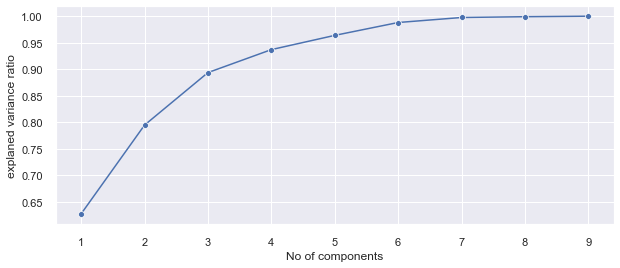

In [143]:
#cum_exp_ratio = np.cumsum(pca.explained_variance_ratio_)
#print(cum_exp_ratio)
#fig=plt.figure(figsize=(10,4))
#ax=sns.lineplot(y=cum_exp_ratio, x=np.arange(1,len(cum_exp_ratio)+1),marker='o')
#ax.set_xlabel('No of components')
#ax.set_ylabel('explaned variance ratio')
#plt.show()

We see that we need atleast 4 components to retain 95% of the variance. 

In [144]:
#pca_df = pd.DataFrame(x_pca, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
#pca_df.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.742747,1.425780,-0.586065,-0.096692,0.057280,-0.312960,0.407722,0.009767,0.029094
1,-0.126661,-1.554842,0.043030,0.120835,-0.100223,0.061979,-0.263678,0.019100,-0.038638


Since we have to base our descision based on socio-economic and health factors, not dropping any components.Going with full data. 

<h3>  K-Means Clustering </h3>

In [171]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #between -1 and 1. more closer to 1 is optimum.
ks=range(2,6)
inertia = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
    
    score = silhouette_score(scaled_data, model.labels_, metric='euclidean')
    print('Silhouetter Score for k=',k,' ', score)

Silhouetter Score for k= 2   0.47241817414163
Silhouetter Score for k= 3   0.48378135871625283
Silhouetter Score for k= 4   0.46042238444804906
Silhouetter Score for k= 5   0.3548371381338797


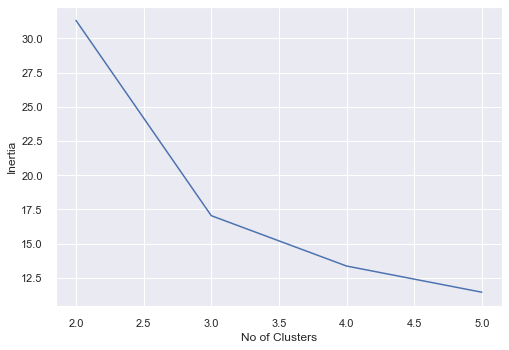

In [172]:
plt.plot(ks,inertia)
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()

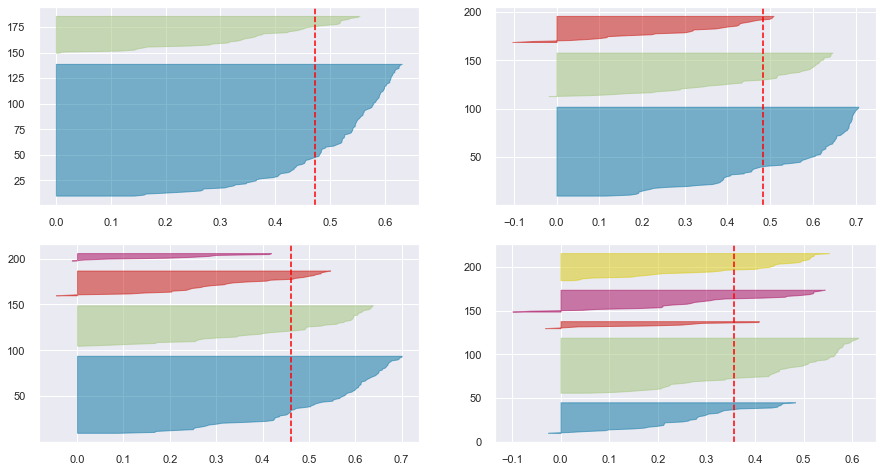

In [173]:
from yellowbrick.cluster import SilhouetteVisualizer


fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i,2)
    
    #create visualiser
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_data)

We will have to choose 3 as it looks more prominent. With 4 and 5, the widths are not distributed well. 

<h3> Agglomerative Heirarchial Clustering</h3>

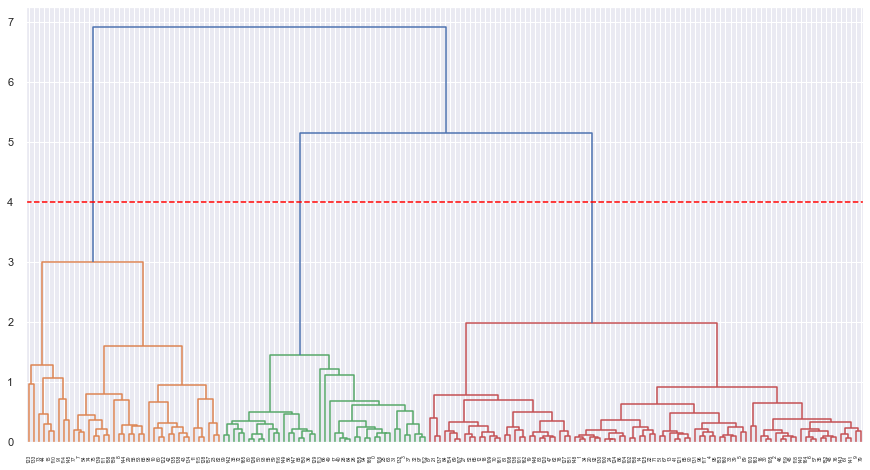

In [175]:
from scipy.cluster.hierarchy import dendrogram,linkage

linked = linkage(scaled_data,method='ward')
plt.figure(figsize = (15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(4,0,5000,colors='red',linestyles='dashed')
plt.show()

It is very clear from HC that there are only 3 clusters. 

In [176]:
#chosing no. of clusters as 3 and refitting kmeans model
model_kmeans = KMeans(n_clusters=3,max_iter=50,random_state = 50)
model_kmeans.fit(scaled_data)
labeks_sc = model_kmeans.predict(scaled_data)
print(labels_sc)

[1 2 2 1 2 2 2 0 0 2 2 2 2 2 2 0 2 1 2 2 2 2 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 2 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 2 2 2 1 1 2 1 2 0 2 2 2 1 0
 2 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 0 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 2 0 2 2 1 2 2 1 2 2 1 0 2 2 1 2 2 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]


In [177]:
#adding produced labels dataframe
data_df['KMean_ClusterID']= pd.Series(labels_sc)
data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


<h3>Visualizing the cluster</h3>

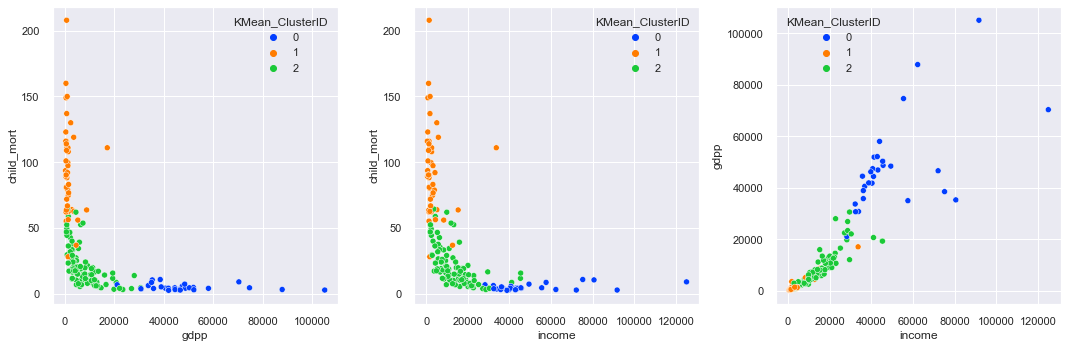

In [178]:
# visualising clusters
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data= data_df, hue = 'KMean_ClusterID', palette="bright")
plt.subplot(1,3,2)
sns.scatterplot(x = 'income', y = 'child_mort', data= data_df, hue = 'KMean_ClusterID', palette="bright")
plt.subplot(1,3,3)
sns.scatterplot(x = 'income', y = 'gdpp', data= data_df, hue = 'KMean_ClusterID', palette="bright")
plt.tight_layout()

plt.show()

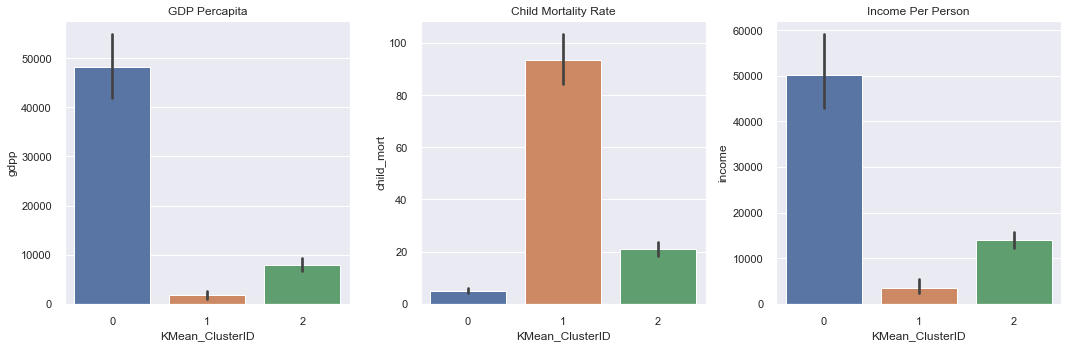

In [179]:
# visualising clusters barplot on : `gdpp, child_mort and income` 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x = 'KMean_ClusterID', y = 'gdpp', data= data_df)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'KMean_ClusterID', y = 'child_mort', data= data_df)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'KMean_ClusterID', y = 'income', data= data_df)
plt.title('Income Per Person')

plt.tight_layout()
plt.show()

Insights:

In th scater plot the clusters are clearly visible
From the bar plot of clusters we could see that,

- Cluster 0 : Developed
- Cluster 1 : Under Developed
- Cluster 2 : Developing 

In [182]:
#Countries in Cluster 1 is our focus.
# sort based on 'child_mort','income','gdpp' in respective order

KMean_cluster_Undeveloped = data_df[data_df['KMean_ClusterID']== 1]
Under_developed_countries  = KMean_cluster_Undeveloped.sort_values(by = ['gdpp','income','child_mort'],
                                                     ascending=[True, True, False])

Under_developed_countries['country'].values

array(['Burundi', 'Liberia', 'Congo, Dem. Rep.', 'Niger', 'Sierra Leone',
       'Madagascar', 'Mozambique', 'Central African Republic', 'Malawi',
       'Eritrea', 'Togo', 'Guinea-Bissau', 'Afghanistan', 'Gambia',
       'Rwanda', 'Burkina Faso', 'Uganda', 'Guinea', 'Haiti', 'Tanzania',
       'Mali', 'Benin', 'Comoros', 'Chad', 'Kenya', 'Senegal', 'Pakistan',
       'Lao', 'Lesotho', 'Mauritania', "Cote d'Ivoire", 'Solomon Islands',
       'Cameroon', 'Ghana', 'Yemen', 'Zambia', 'Sudan', 'Kiribati',
       'Nigeria', 'Congo, Rep.', 'Angola', 'Timor-Leste', 'Iraq',
       'Namibia', 'Gabon', 'Equatorial Guinea'], dtype=object)